In [1]:
# allow imports from src
import sys

sys.path.append("..")

In [2]:
# autoreload code
%load_ext autoreload
%autoreload 2

# Roof Image Scraping from Satellite Images

Finding bounding boxes for houses with obstructions (trees) is complicated. Let's just use Google's satellite + street view images for gold label of houses. We'll find bounding boxes from the street image and overlay them on the satellite images.

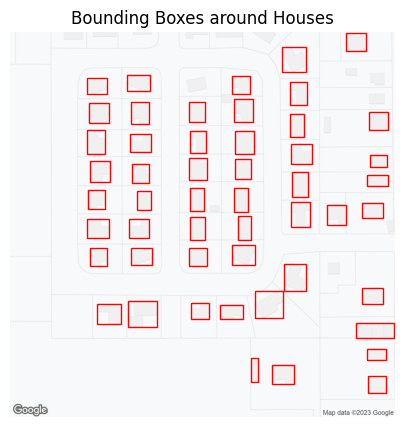

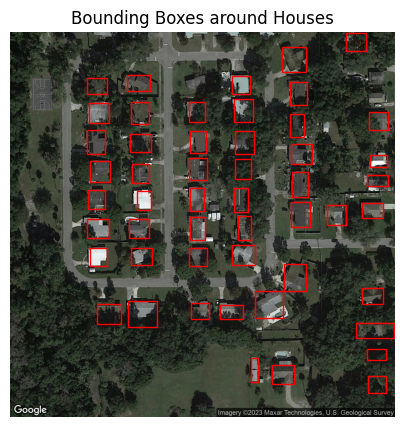

In [3]:
import os
from src.bounding_boxes import find_roof_boxes, display_bounding_boxes, load_image

data_dir = "data"

# load test images
test_satellite_map = os.path.join("..", data_dir, "satellite_map.png")
test_street_map = os.path.join("..", data_dir, "street_map.png")

image, boxes = find_roof_boxes(test_street_map)
satellite_image = load_image(test_satellite_map)

display_bounding_boxes(image, boxes)
display_bounding_boxes(satellite_image, boxes)

In [4]:
from src.crop_images import crop_image

roof_images = [crop_image(satellite_image, *box, buffer=5) for box in boxes]

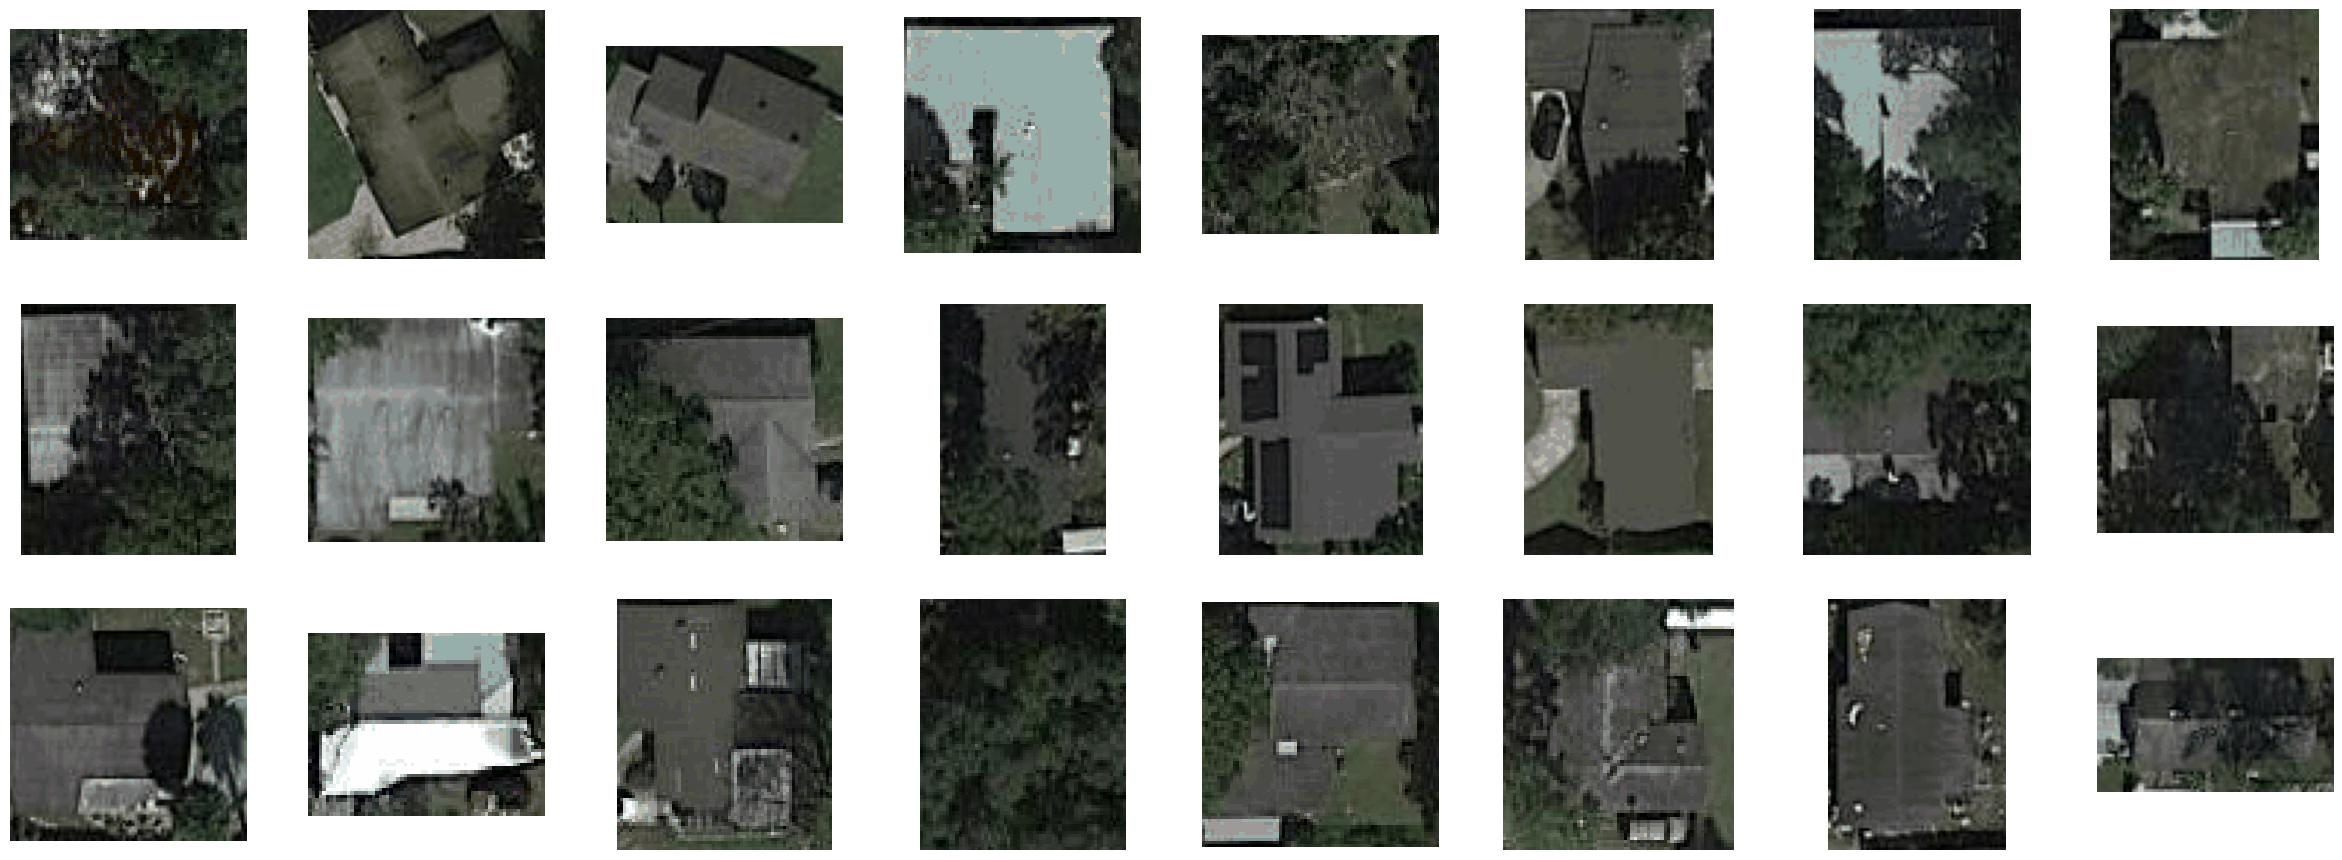

In [5]:
from src.utils import display_multiple_images

display_multiple_images(roof_images[:24], n_cols=8)